Train Set

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

In [4]:
train_set=tf.keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 70295 files belonging to 38 classes.


I0000 00:00:1756393227.599354      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [5]:
valid_set=tf.keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 17572 files belonging to 38 classes.


In [6]:
train_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [7]:
valid_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

Model Building 

In [8]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [9]:
model=Sequential()

In [10]:
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[128,128,3],padding='same'))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Conv2D(filters=64,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [12]:
model.add(Conv2D(filters=128,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [13]:
model.add(Conv2D(filters=256,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [14]:
model.add(Conv2D(filters=512,kernel_size=3,activation='relu',padding='same'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [15]:
model.add(Dropout(0.25))

In [16]:
model.add(Flatten())

In [17]:
model.add(Dense(units=1500,activation='relu'))

In [18]:
model.add(Dropout(0.4))

In [19]:
model.add(Dense(units=38,activation='softmax'))

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [22]:
train_history=model.fit(x=train_set,validation_data=valid_set,epochs=10)

Epoch 1/10


I0000 00:00:1756393239.394020     103 service.cc:148] XLA service 0x7ff71c01af90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756393239.395208     103 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1756393240.114014     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


   5/2197 ━━━━━━━━━━━━━━━━━━━━ 1:12 33ms/step - accuracy: 0.0248 - loss: 4.6701 

I0000 00:00:1756393247.452365     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 158s 66ms/step - accuracy: 0.4152 - loss: 2.0767 - val_accuracy: 0.8352 - val_loss: 0.5170
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.8342 - loss: 0.5357 - val_accuracy: 0.9033 - val_loss: 0.3010
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9036 - loss: 0.2998 - val_accuracy: 0.9297 - val_loss: 0.2106
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9316 - loss: 0.2114 - val_accuracy: 0.9415 - val_loss: 0.1772
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9533 - loss: 0.1444 - val_accuracy: 0.9464 - val_loss: 0.1716
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9617 - loss: 0.1149 - val_accuracy: 0.9409 - val_loss: 0.1979
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 35ms/step - accuracy: 0.9695 - loss: 0.0917 - val_accuracy: 0.9602 - val_loss: 0.1263
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 76s 34ms/step - accuracy: 0.9757 - loss: 0.0

Model Evaluation

In [23]:
train_loss,train_accuracy=model.evaluate(train_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.9960 - loss: 0.0135


In [24]:
print(train_loss,train_accuracy)

0.012293672189116478 0.9965431690216064


In [25]:
valid_loss,valid_accuracy=model.evaluate(valid_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9738 - loss: 0.0841


In [26]:
print(valid_loss,valid_accuracy)

0.08020276576280594 0.9753016233444214


In [27]:
model.save('/kaggle/working/my_model.h5') 

In [30]:
train_history.history

{'accuracy': [0.6123763918876648,
  0.8583256006240845,
  0.9141474962234497,
  0.9372643828392029,
  0.9563838243484497,
  0.9634397625923157,
  0.9726011753082275,
  0.9761576056480408,
  0.9799843430519104,
  0.9821751117706299],
 'loss': [1.3139170408248901,
  0.45002076029777527,
  0.2670466899871826,
  0.19195227324962616,
  0.13414081931114197,
  0.10912594199180603,
  0.08345367014408112,
  0.07364622503519058,
  0.06331877410411835,
  0.05612538754940033],
 'val_accuracy': [0.8351923227310181,
  0.903312087059021,
  0.9296607971191406,
  0.9414978623390198,
  0.9463919997215271,
  0.9408718347549438,
  0.9601638913154602,
  0.9545299410820007,
  0.9589118957519531,
  0.9753016233444214],
 'val_loss': [0.5169956684112549,
  0.3010037839412689,
  0.21057383716106415,
  0.17720967531204224,
  0.17156921327114105,
  0.1979047954082489,
  0.1263446807861328,
  0.15441936254501343,
  0.12934264540672302,
  0.08020279556512833]}

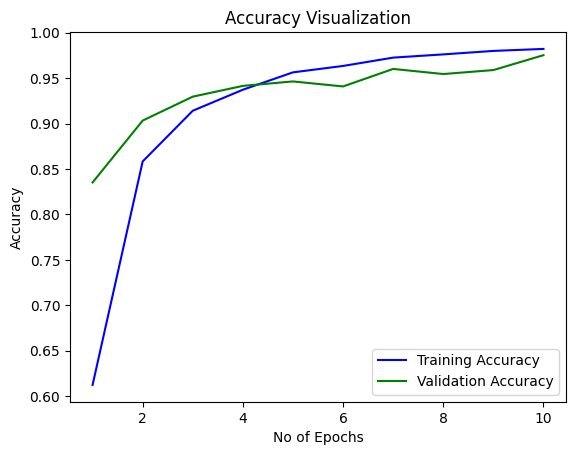

In [32]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,train_history.history['accuracy'],color='blue',label='Training Accuracy')
plt.plot(epochs,train_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Visualization')
plt.legend()
plt.show()

In [33]:
test_set=tf.keras.utils.image_dataset_from_directory(
    directory="/kaggle/input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 17572 files belonging to 38 classes.


In [34]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step


(array([[9.9999988e-01, 2.8063994e-11, 1.1456679e-12, ..., 4.8956001e-15,
         1.2810146e-14, 5.8597163e-14],
        [9.9989438e-01, 1.1632446e-05, 2.8281850e-09, ..., 7.0662417e-12,
         2.8480487e-11, 2.3009465e-10],
        [1.0000000e+00, 4.8571694e-15, 1.8449022e-16, ..., 5.0805184e-20,
         4.0804001e-18, 7.7241300e-16],
        ...,
        [2.1859368e-13, 4.5847606e-18, 6.2151461e-13, ..., 1.2981661e-14,
         1.6201714e-16, 1.0000000e+00],
        [4.7621312e-12, 5.3658796e-17, 1.1067319e-12, ..., 3.0043595e-13,
         7.9962129e-15, 1.0000000e+00],
        [1.6843021e-14, 2.5938197e-17, 2.6853526e-15, ..., 6.2925019e-16,
         1.4673319e-15, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [35]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [36]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [37]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [38]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
classification_report(y_true,predicted_categories,target_names=test_set.class_names)

'                                                    precision    recall  f1-score   support\n\n                                Apple___Apple_scab       0.96      0.96      0.96       504\n                                 Apple___Black_rot       0.98      1.00      0.99       497\n                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440\n                                   Apple___healthy       0.99      0.94      0.96       502\n                               Blueberry___healthy       0.98      0.99      0.99       454\n          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421\n                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456\nCorn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.92      0.93       410\n                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477\n               Corn_(maize)___Northern_Leaf_Blight       0.95      

In [48]:
cm=confusion_matrix(y_true,predicted_categories)
cm.shape
cm

array([[486,   1,   1, ...,   0,   0,   0],
       [  0, 495,   0, ...,   0,   0,   0],
       [  0,   0, 431, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 486,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 478]])

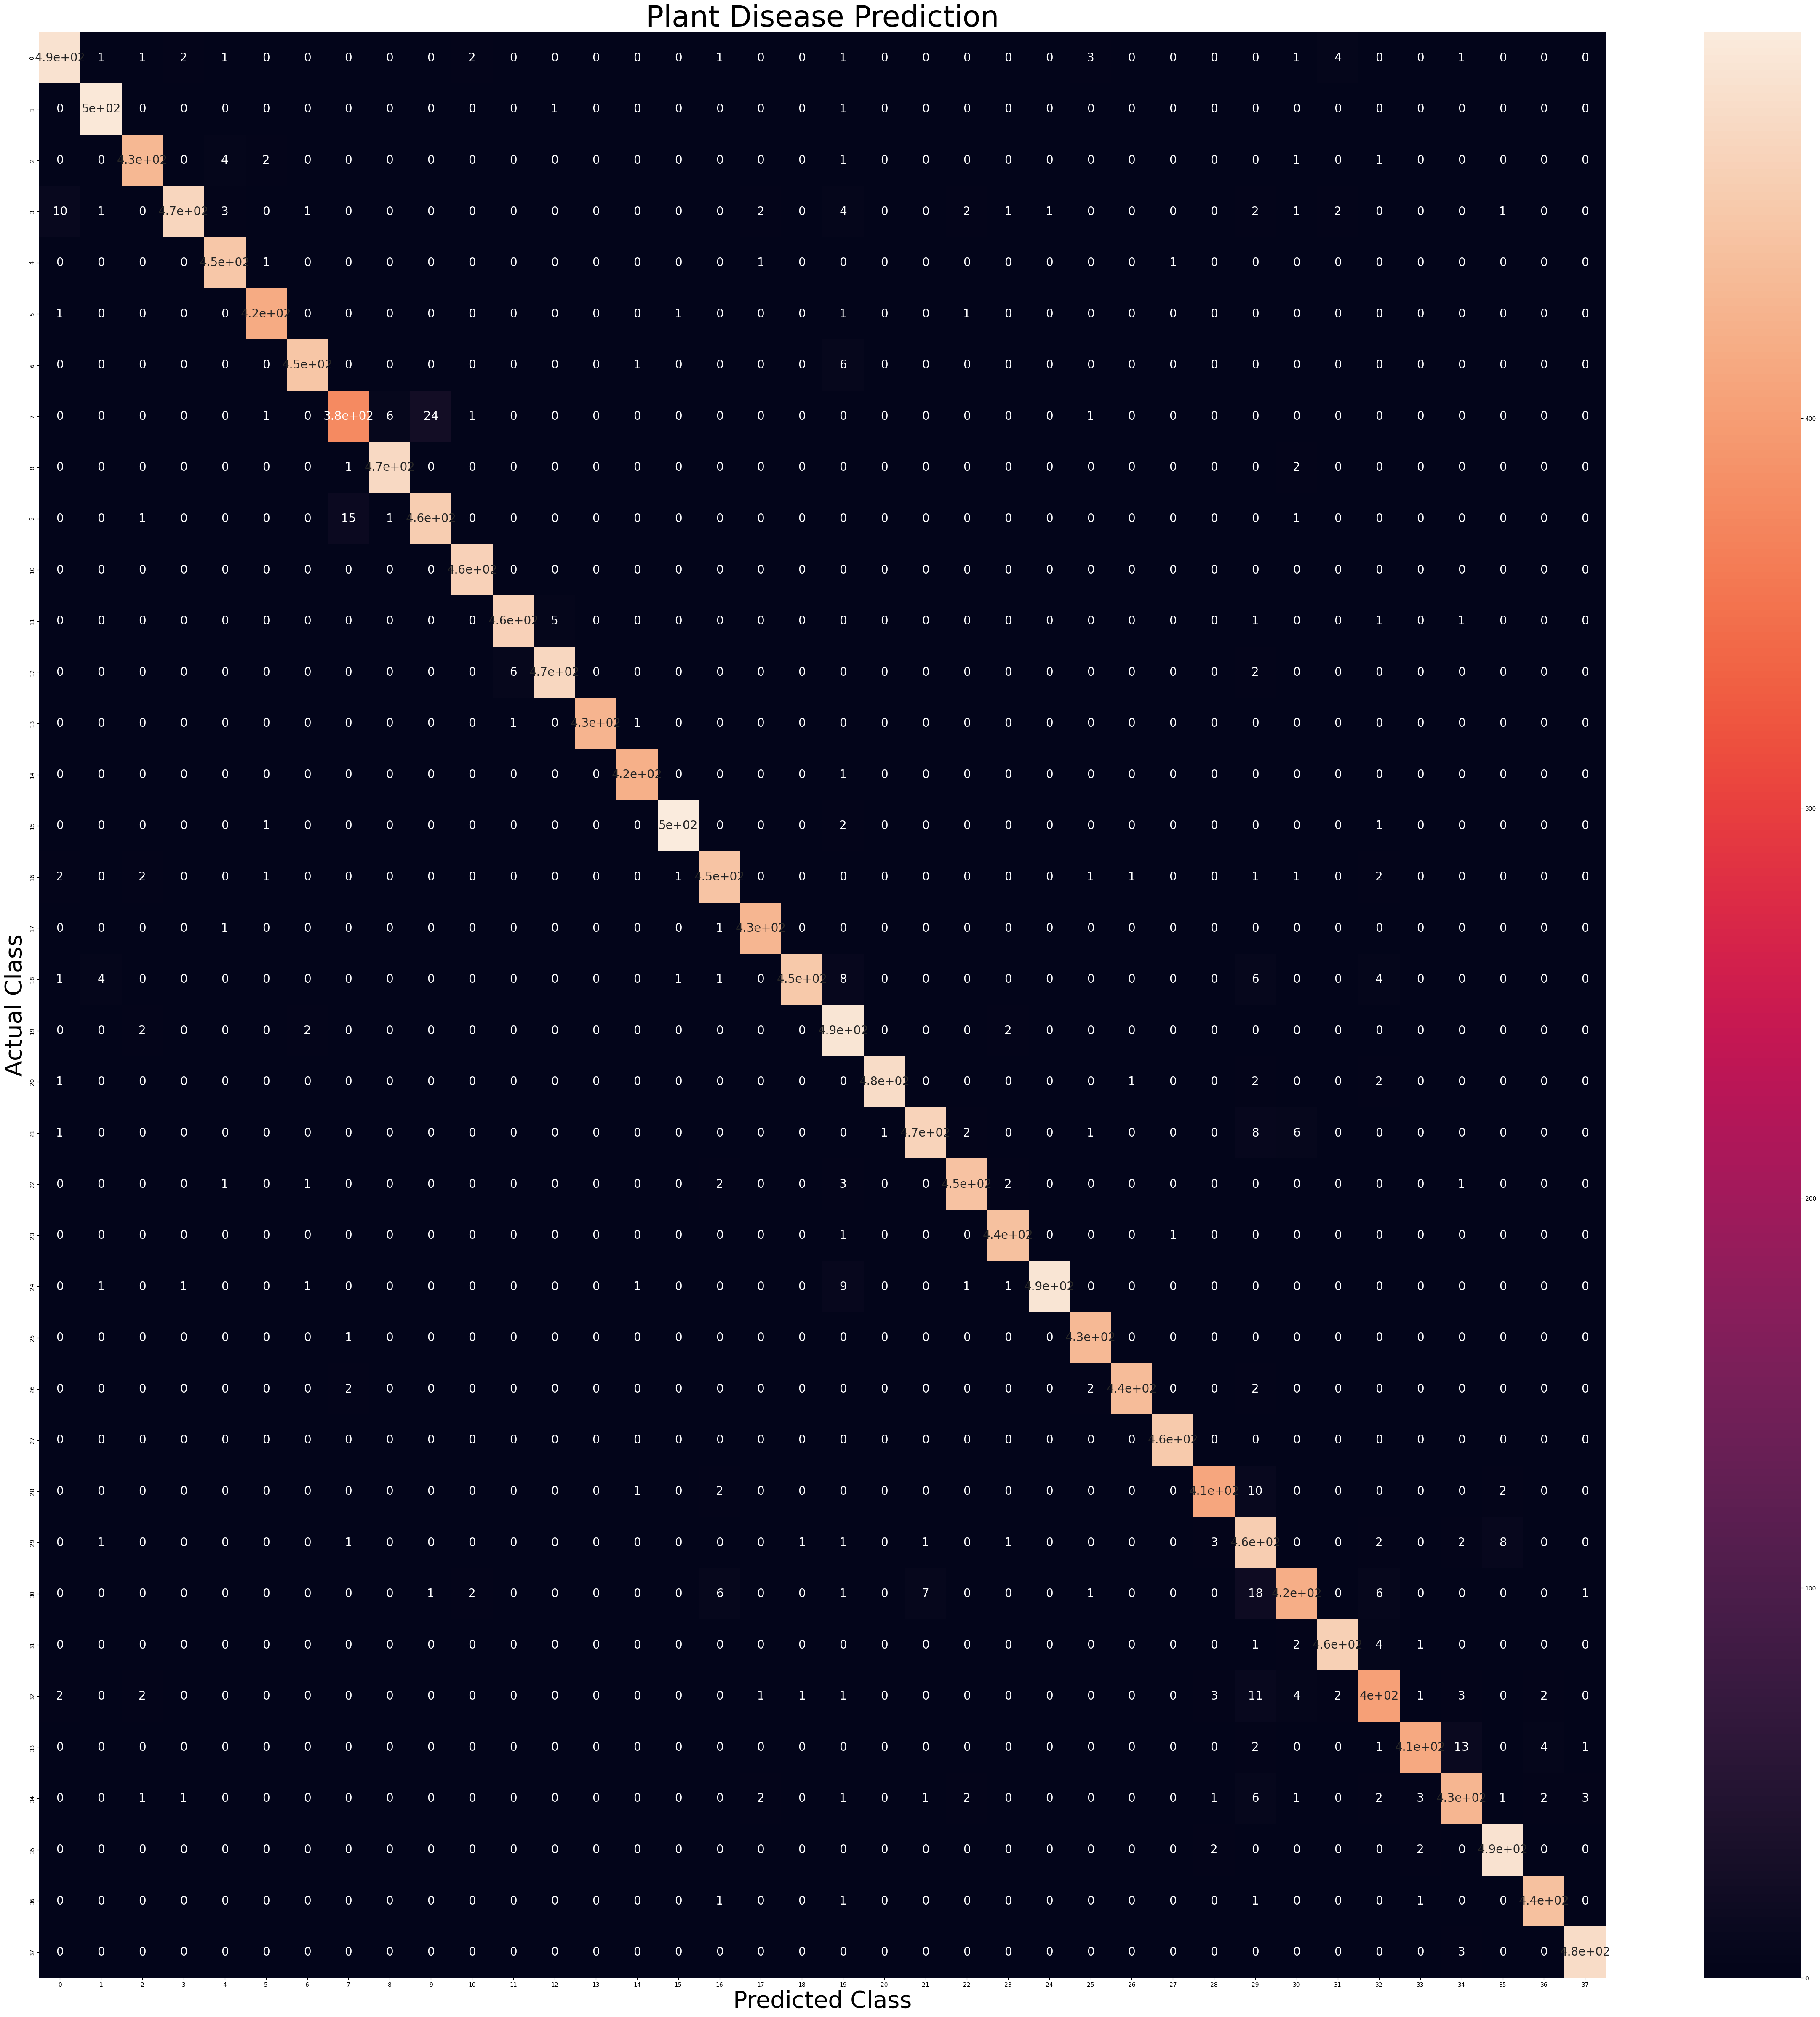

In [53]:
plt.figure(figsize=(60,60))
sns.heatmap(cm,annot=True,annot_kws={'size':20})
plt.xlabel('Predicted Class',fontsize=40)
plt.ylabel('Actual Class',fontsize=40)
plt.title('Plant Disease Prediction',fontsize=50)
plt.show()